# MATH 307 Homework 2 (Part 2)

### Instructions

* There are 3 exercises and 35 total points.
* Write your solutions in the cells below.
* You may work on these problems with others but you must write your solutions on your own.
* Execute the test cells to verify that your solutions pass.
* **Grading includes hidden tests!** Your solution may not be completely correct even if it passes all tests below.
* Make sure your notebook executes correctly in order from top to bottom.
* Submit this notebook to Canvas.

In [5]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn import datasets
import networkx as nx

## Exercise 1: Principal Component Analysis

The following code imports the digits dataset from [sklearn](https://scikit-learn.org/stable/) and selects the subset of the data correpsonding to the digit `9`.

    data = datasets.load_digits()
    X = data['data']
    y = data['target']
    X9 = X[y == 9] # This line selects the rows corresponding to 9s

(a) Copy, paste and modify the code above to find the first weight vector for the data consisting of the digit `1`. Use the code from [MATH 307 notebook on PCA](https://mlange01.github.io/MATH307/notebooks/PrincipalCompontentAnalysis.html). Reshape the first weight vector as a 8 by 8 matrix and save the result as `w1`.

Verify your weight vector looks like a `1` by plotting the matrix with the commands:

```
plt.imshow(w1,cmap='binary',interpolation='gaussian')
plt.colorbar()
plt.show()
```

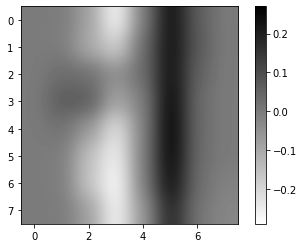

In [45]:
data = datasets.load_digits()
X = data['data']
y = data['target']
X1 = X[y == 1] # This line selects the rows corresponding to 1s
Xdiff = X1 - X1.mean(axis=0)
P,S,QT = la.svd(Xdiff)
w1 = QT[0,:].reshape(8,8)
plt.imshow(w1,cmap='binary',interpolation='gaussian')
plt.colorbar()
plt.show()

In [46]:
# Verify w1 is a NumPy array
assert isinstance(w1,np.ndarray)
print("Exercises 1a Test 1: Success!")

Exercises 1a Test 1: Success!


In [47]:
# Verify w1 has the correct size
assert w1.shape == (8,8)
print("Exercises 1a Test 2: Success!")

Exercises 1a Test 2: Success!


In [48]:
# Verify w1 has correct values (up to absolute value)
assert np.allclose(np.abs(w1[3:5,4:6]),np.abs(np.array([[0.00963177, 0.26208274],[-0.01229312, 0.26978355]])))
print("Exercises 1a Test 3: Success!")

Exercises 1a Test 3: Success!


(b) The same procedure from part (a) applied to the digit `4` produces the weight vector `w4` defined in the cell below. We want to use the first weight vector `w1` you found in part (a) and the given first weight vector `w4` to set up a very basic image recognition algorithm. For simplicity we will work only with the first ten handwritten images of the digit `1` and of the digit `4` from the digits dataset `X`.

Here is an example that will help you with the code you need write below. Suppose we wanted to save the first five images of the digit `9` in the dataset `X` to a NumPy array called `Y9`. This can be done by typing

```
Y9 = X[y == 9][0:5]
```

Five handwritten images of the digit `9` are now stored as 1 x 64 vector (ie. a row vector) in the 5 x 64 NumPy array `Y9`. (You can check this by letting Python print out this array.)

**A simple digit recognition algorithm** 

We start with the first ten images of the digit `1` from the digit dataset X. Our **digit recognition algorithm** will decide if each image is more similar to a `1` or to a `4`. Obviously the algorithm does not know that we only test images of `1` at the moment. Our algorithm will compute the inner product between each test image and the two first weight vectors `w1` and `w4`. The algorithm then decides that the underlying digit is closer to `1` (respectively `4`) if the inner product of the test image with `w1` (respectively `w4`) is greater (in absolute value) that the other inner product. The recognized value should then be stored in a NumPy array called `RecoImY1`. Recall that in our test, we only consider images of the digit `1` at the moment. 

If this algorithm works perfectly, all entries of `RecoImY1` would be `1`. **This will not happen because some 1s will be mistaken for 4s.**

**Hints**

1. Recall that the weight vectors `w1` and `w4` were reshaped to have form (8,8), so you need to bring them back into their original form, which had shape (64,).
2. You need to initialize the NumPy array `RecoImY1` before you can use it. In the above case for the digit `9` this would for example work by writing
    ```
    RecoImY9 = np.zeros(Y9.shape[0])
    ```
    `RecoImY9` is then a NumPy array of zeros with shape (5,).
3. You will need `if` statements to write the algorithm. The syntax is as follows: 
    ```
    if x > y: 
        Do what is written here
    else: 
        Do what is writen here
    ```
   Note that you can also do other logical conditions like: `x < y`, `x <= y` or `x >= y`.
4. A `for` loop will be useful for an efficient algorithm. You could also test everything by hand, but why not let the computer do it for you. The syntax is as follow:
    ```
    for x in range(a,b):  
        Do what ever is written here as long as x is smaller than b
    ```
    Note that $x$ is initially equal to $a$ but will never be equal to $b$ since the loop ends when $x = b - 1$, i.e. over the course of the loop x will have the values 
    $$
    a, a + 1, a + 2, \ldots , b - 2, b - 1
    $$

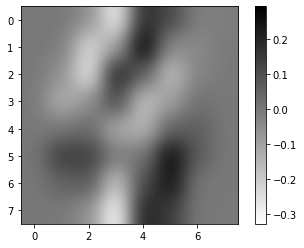

In [49]:
w4 = np.array([[ 7.08079050e-18,  0.00000000e+00, -5.02849518e-02, -2.97238642e-01,  1.84695575e-01,  1.14899381e-01, -1.58116851e-02, -1.11368171e-02],
               [-3.38813179e-21, -7.43279726e-03, -2.35073952e-01, -9.98801157e-02,  2.92945664e-01, -4.74672855e-02, -4.14894802e-02, -3.22223275e-03],
               [-9.24446373e-33, -5.69690091e-02, -2.77798747e-01,  2.12806922e-01,  5.69532859e-02, -1.75771476e-01, -2.43629307e-02, -2.88819118e-03],
               [-3.39187263e-04, -1.39856359e-01, -5.72190559e-02,  1.18455371e-01, -1.85598799e-01, -9.14062156e-02,  2.11290667e-02, -1.50005173e-04],
               [ 0.00000000e+00,  5.10044783e-03,  3.89027431e-02, -1.24666150e-01, -1.51310463e-01,  5.40415172e-02,  6.72485790e-02,  0.00000000e+00],
               [ 4.86713162e-03,  1.50174435e-01,  1.39099853e-01, -5.18899069e-03,  9.49909392e-03,  2.71113924e-01,  6.95007367e-02,  0.00000000e+00],
               [ 4.39152824e-03,  4.94882760e-02,  7.68346479e-02, -1.93246236e-01,  1.07909526e-01,  2.49266964e-01,  1.62298306e-03,  0.00000000e+00],
               [ 0.00000000e+00, -2.13829777e-05, -5.72504349e-02, -3.26616375e-01,  2.19895171e-01,  1.42051636e-01,  0.00000000e+00,  0.00000000e+00]])

plt.imshow(w4,cmap='binary',interpolation='gaussian')
plt.colorbar()
plt.show()

In [60]:
# reshaping
w1 = w1.reshape(64,)
w4 = w4.reshape(64,)

# saving handwritten images
Y1 = X[y == 1][0:10]
Y4 = X[y == 4][0:10]

# recognized array initialization
RecoImY1 = np.zeros(Y1.shape[0])

# main loop to differentiate images
for i in range(Y1.shape[0]):
    image = Y1[i]
    if np.abs(np.inner(image,w1)) > np.abs(np.inner(image,w1)):
        RecoImY1[i] = 1
    else:
        RecoImY1[i] = 4

In [61]:
# Verify RecoImY1 is a NumPy array
assert isinstance(RecoImY1,np.ndarray)
print("Exercises 1b Test 1: Success!")

Exercises 1b Test 1: Success!


In [62]:
# Verify RecoImY1 has the correct size
assert RecoImY1.shape == (10,)
print("Exercises 1b Test 2: Success!")

Exercises 1b Test 2: Success!


In [63]:
# Verify RecoImY1 has the correct values
# Note: this cell contains hidden tests
print("Exercises 1b Test 3: Success!")

Exercises 1b Test 3: Success!


(c) Applying the same procedure from part (b) for the first ten images of the digit `4` we obtain the array

```
RecoImY4 = np.array([4., 4., 4., 1., 4., 4., 1., 4., 4., 4.])
```

How many images did our algorithm recognize correctly? 

Write the number of correctly recognized images of the digit `1` into the variable `CorrectlyRecognized1s`. Accordingly write the number of correctly recognized images of the digit `4` to the variable `CorrectlyRecognized4s` and print both with the following commands:

```
print("Number of correctly recognized 1s:", CorrectlyRecognized1s)
print("Number of correctly recognized 4s:", CorrectlyRecognized4s)
```

In [66]:
RecoImY4 = np.array([4., 4., 4., 1., 4., 4., 1., 4., 4., 4.])

CorrectlyRecognized1s = 0
CorrectlyRecognized4s = 0

for val in RecoImY1:
    if val == 1:
        CorrectlyRecognized1s = CorrectlyRecognized1s + 1

for val in RecoImY4:
    if val == 4:
        CorrectlyRecognized4s = CorrectlyRecognized4s + 1

print("Number of correctly recognized 1s:", CorrectlyRecognized1s)
print("Number of correctly recognized 4s:", CorrectlyRecognized4s)

Number of correctly recognized 1s: 0
Number of correctly recognized 4s: 8


In [67]:
# Verify CorrectlyRecognized1s and CorrectlyRecognized4s are defined as integers and have the correct values
# Note: this cell contains hidden tests
assert isinstance(CorrectlyRecognized1s,int)
assert isinstance(CorrectlyRecognized4s,int)
print("Exercises 1c Test 1: Success!")

Exercises 1c Test 1: Success!


# Exercise 2: SVD of Toeplitz matrices

The SVD of a matrix $A = P \Sigma Q^T$ yields a formula for $A$ as a sum of rank one matrices

$$
A = \sigma_1 \mathbf{p}_1 \mathbf{q}_1^T + \cdots + \sigma_r \mathbf{p}_r \mathbf{q}_r^T
$$

The truncated SVD of rank $k \leq r$ is given by

$$
A_k = \sigma_1 \mathbf{p}_1 \mathbf{q}_1^T + \cdots + \sigma_k \mathbf{p}_k \mathbf{q}_k^T
$$

Note that the product of vectors $\mathbf{p} \mathbf{q}^T$ is called the outer product. Use the function [`numpy.outer`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) to compute the outer product of vectors.

The following code creates a Toeplitz matrix $A$ of size $N$.

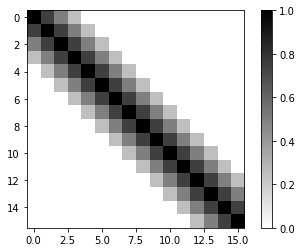

In [69]:
N = 16
c = np.zeros(N)
c[:4] = np.array([1.0,0.75,0.5,0.25])
A = la.toeplitz(c)
plt.imshow(A,cmap='binary')
plt.colorbar()
plt.show()

(a) Compute the SVD of $A$ and then compute $\sigma_1 \mathbf{p}_1 \mathbf{q}_1^T$ and save the result as `s1p1q1T`. Recall, in Python, array indices begin at 0 not 1.

In [141]:
P,S,QT = la.svd(A, full_matrices=True, compute_uv=True)

s1p1q1T = S[0]*np.outer(P[:,0], QT[0])

In [142]:
# Verify s1p1q1T is a NumPy array
assert isinstance(s1p1q1T,np.ndarray)
print("Exercises 2a Test 1: Success!")

Exercises 2a Test 1: Success!


In [143]:
# Verify s1p1q1T is the correct size
assert s1p1q1T.shape == (16,16)
print("Exercises 2a Test 2: Success!")

Exercises 2a Test 2: Success!


In [144]:
# Verify s1p1q1T has the correct values
assert np.allclose(s1p1q1T[:2,:2],np.array([[0.03147122, 0.04833746],[0.04833746, 0.07424275]]))
print("Exercises 2a Test 3: Success!")

Exercises 2a Test 3: Success!


(b) Plot the matrix $\sigma_k \mathbf{p}_k \mathbf{q}_k^T$ for different values $k$ using the code

    skpkqkT = # Modify your code from part (a)
    plt.imshow(skpkqkT,cmap='binary')
    plt.colorbar()

Based on your observations, determine whether the following statement is `True` or `False`:

> As $k$ increases, the matrix $\sigma_k \mathbf{p}_k \mathbf{q}_k^T$ contains higher frequency data. In other words, as $k$ increases, the entries in the matrix oscillate more quickly from entry to entry across the matrix.

Save your response to the variable `high_frequency`.

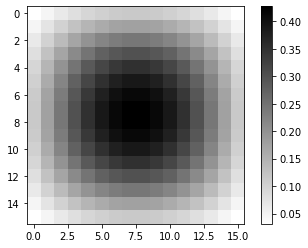

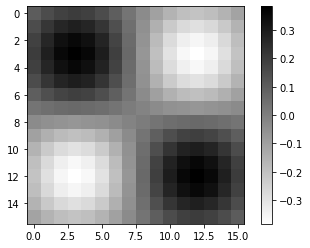

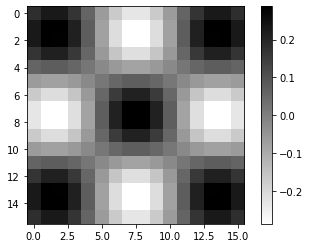

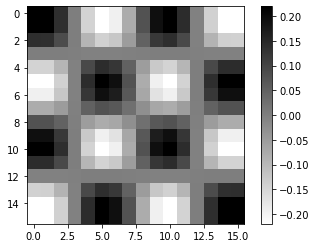

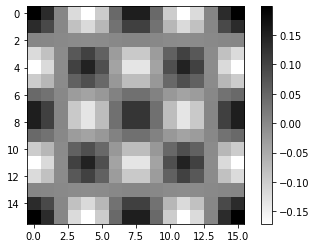

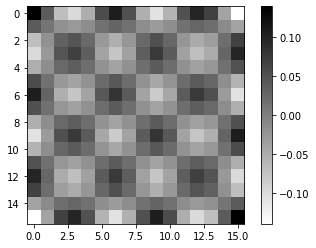

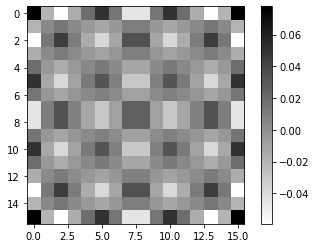

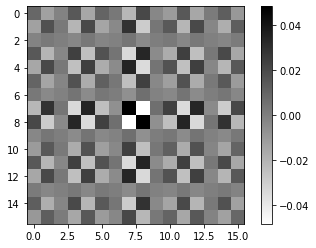

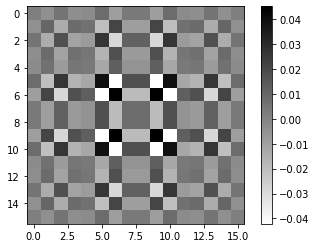

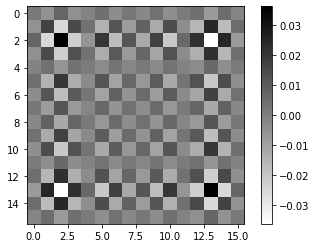

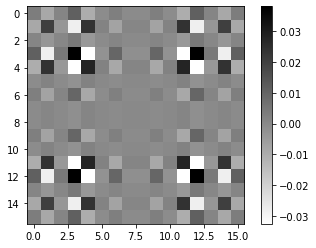

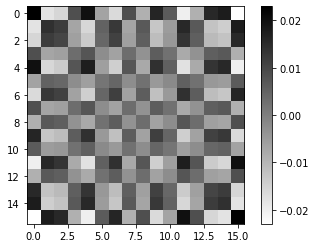

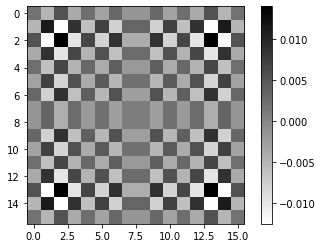

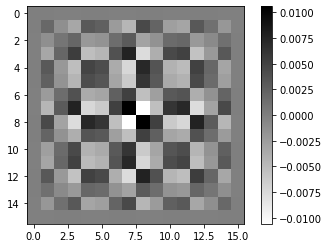

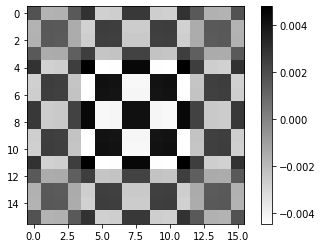

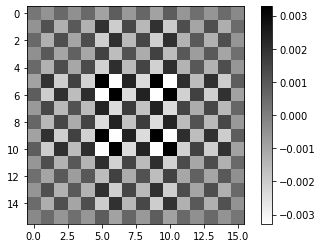

In [145]:
for k in range(N):
    skpkqkT = S[k]*np.outer(P[:,k], QT[k])
    plt.imshow(skpkqkT,cmap='binary')
    plt.colorbar()
    plt.show()
high_frequency = True

In [146]:
# Verify high_frequency is defined as True or False (boolean value)
assert isinstance(high_frequency,bool)
print("Exercises 2b Test 1: Success!")

Exercises 2b Test 1: Success!


In [147]:
# Verify high_frequency has correct value
# Note: this cell contains hidden tests
print("Exercises 2b Test 2: Success!")

Exercises 2b Test 2: Success!


(c) Use `plt.plot(S,'b.')` to plot the singular values of $A$ as a scatter plot. How many singular values are greater than $1/2$? Save your response as `n_singular_values`.

6


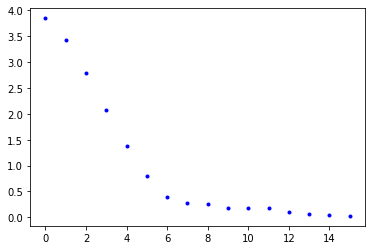

In [173]:
plt.plot(S,'b.')

n_singular_values = 0

for val in S:
    if val > 0.5:
        n_singular_values = n_singular_values + 1

print(n_singular_values)

In [174]:
# Verify n_singular_values is defined as an integer
assert isinstance(n_singular_values,int)
print("Exercises 2c Test 1: Success!")

Exercises 2c Test 1: Success!


In [175]:
# Verify n_singular_values has correct value
# Note: this cell contains hidden tests
print("Exercises 2c Test 2: Success!")

Exercises 2c Test 2: Success!


(d) The following code computes the truncated SVD $A_k$

    Ak = sum([S[i]*np.outer(P[:,i],QT[i,:]) for i in range(0,k)])

Copy, paste and modify the code to compute the truncated pseudoinverse

$$
A_k^+ = \frac{1}{\sigma_1} \mathbf{q}_1 \mathbf{p}_1^T + \cdots + \frac{1}{\sigma_k} \mathbf{q}_k \mathbf{p}_k^T
$$

where $k$ is the number found in part (c). In other words, $\sigma_1,\dots,\sigma_k > 1/2$ and $\sigma_m \leq 1/2$ for $m > k$. Save the result as `Ak_plus`.

In [186]:
Ak_plus = sum([(1/S[i])*np.outer(QT[i,:],P[:,i]) for i in range(0,n_singular_values)])

In [187]:
# Verify Ak_plus is a NumPy array
assert isinstance(Ak_plus,np.ndarray)
print("Exercises 2d Test 1: Success!")

Exercises 2d Test 1: Success!


In [188]:
# Verify Ak_plus has the correct shape
assert Ak_plus.shape == (16,16)
print("Exercises 2d Test 2: Success!")

Exercises 2d Test 2: Success!


In [189]:
# Verify Ak_plus has the correct values
assert np.allclose(Ak_plus[:2,:2],np.array([[0.41329088, 0.23136187],[0.23136187, 0.17793872]]))
print("Exercises 2d Test 3: Success!")

Exercises 2d Test 3: Success!


## Exercise 3: PageRank

The cell below reads the data from the file `webgraph.txt` and creates a directed graph $G$ with 100 nodes, its adjacency matrix $A$ and the stochastic matrix $P$, and plots the graph. The matrix $P$ represents the markov chain for the process: at each step, click a random link on the page.

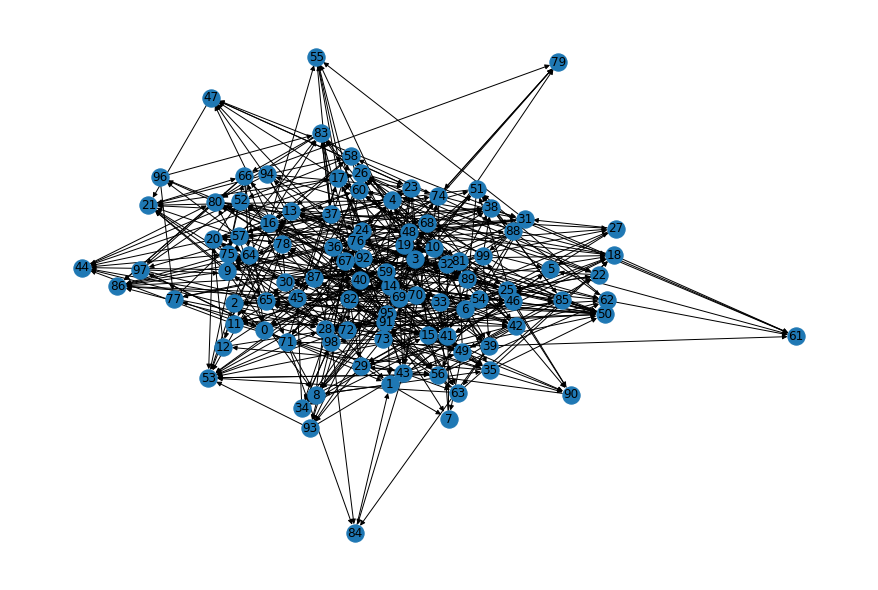

In [194]:
G = nx.read_edgelist('webgraph.txt',create_using=nx.DiGraph)
mapping = {n: i for i,n in enumerate(G.nodes)}
G = nx.relabel_nodes(G,mapping)
A = np.array(nx.adjacency_matrix(G).todense().T)
P = A/A.sum(axis=0)

plt.figure(figsize=(12,8))
nx.draw(G,with_labels=True)
plt.show()

(a) Create the Google matrix $\alpha P + (1 - \alpha)\mathbf{v} \mathbf{e}^T$ for $\alpha = 0.85$ where $\mathbf{e}$ is the vector with all ones and $\mathbf{v} = 0.01 \mathbf{e}$ is the uniform distribution vector for $N=100$ nodes. Save the result as `M`.

In [195]:
N = 100
a = 0.85
e = np.ones(N)
v = 0.01*e
M = a*P + (1-a)*v*np.transpose(e)

In [196]:
# Verify M is a NumPy array
assert isinstance(M,np.ndarray)
print("Exercises 3a Test 1: Success!")

Exercises 3a Test 1: Success!


In [197]:
# Verify M has the correct size
assert M.shape == (100,100)
print("Exercises 3a Test 2: Success!")

Exercises 3a Test 2: Success!


In [198]:
# Verify M has correct values
assert np.allclose(M[:2,:2],np.array([[0.0015, 0.0015],[0.214 , 0.0015]]))
print("Exercises 3a Test 3: Success!")

Exercises 3a Test 3: Success!


(b) The following code performs 5 iterations of the power method (without normalization) with initial vector $\mathbf{x}_0 = [1 \ 0 \ \cdots \ 0]^T$:

    iterations = 5
    xk = np.zeros(100)
    xk[0] = 1
    for k in range(0,iterations):
        xk = M @ xk
    
Copy, paste and modify the code to perform 10 iterations and use the function `numpy.argmax` to find the webpage with the highest probability in the state vector $\mathbf{x}_k$. Save the index as `webpage1`. Plot the graph with colors given by the state vector using the following code:

    plt.figure(figsize=(12,8))
    nx.draw(G,node_color=xk,cmap='winter',with_labels=True)

In [199]:
iterations = 10
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M @ xk

webpage1 = np.argmax(xk)


In [200]:
# Verify webpage1 is a NumPy integer
assert isinstance(webpage1,np.int64)
print("Exercises 3b Test 1: Success!")

Exercises 3b Test 1: Success!


In [201]:
# Verify webpage1 has the correct value
assert isinstance(webpage1,np.int64)
print("Exercises 3b Test 2: Success!")

Exercises 3b Test 2: Success!


(c) Repeat (b) but now with 100 iterations. Save the result as `webpage2`.

In [204]:
iterations = 100
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M @ xk

webpage2 = np.argmax(xk)

In [205]:
# Verify webpage2 is a NumPy integer
assert isinstance(webpage2,np.int64)
print("Exercises 3c Test 1: Success!")

Exercises 3c Test 1: Success!


In [206]:
# Verify webpage2 has the correct value
# Note: this cell contains hidden tests
print("Exercises 3c Test 2: Success!")

Exercises 3c Test 2: Success!


(d) Let $\mathbf{v}$ be the vector where $v_i = 1/10$ for the 10 indices $i=94, 96, 87, 88, 12, 95, 16, 93, 99, 77$ and all other $v_j = 0$. Create the Google matrix for $\alpha = 0.9$ and the vector $\mathbf{v}$ defined in the cell above. Save the result as `M10`.

The indices included in $\mathbf{v}$ are the webpages with lowest pagerank after 20 iterations. Execute the cell below to verify. The matrix `M10` is the stochastic matrix for the process: either click a link with probability 0.9 or return to one of the low rank webpages listed in $\mathbf{v}$.

In [208]:
iterations = 20
xk = np.zeros(100)
xk[0] = 1
for k in range(0,iterations):
    xk = M@xk

np.argsort(xk)[:10]

array([94, 96, 87, 88, 12, 95, 16, 93, 99, 77])

In [209]:
a = 0.9
e = np.ones(N)
v = np.zeros(N)
for i in range(len(v)):
    if i in np.argsort(xk)[:10]:
        v[i] = 1/10

M10 = a*P + (1-a)*v*np.transpose(e)

In [210]:
# Verify M10 is a NumPy array
assert isinstance(M10,np.ndarray)
print("Exercises 3d Test 1: Success!")

Exercises 3d Test 1: Success!


In [211]:
# Verify M10 has the correct size
assert M10.shape == (100,100)
print("Exercises 3d Test 2: Success!")

Exercises 3d Test 2: Success!


In [213]:
# Verify M10 has the correct values
print(M10[87:89,90:92])
assert np.allclose(M10[87:89,90:92],np.array([[0.01, 0.11],[0.01, 0.01]]))
print("Exercises 3d Test 3: Success!")

[[0.  0.1]
 [0.  0. ]]


AssertionError: 

(e) Let's see if this new markov chain changes the result. Compute 10 iterations of the power method (without normalization) for `M10` starting with initial vector $\mathbf{x}_0 = [1 \ 0 \ \cdots \ 0]^T$. Use the function `numpy.argmax` to find the webpage with the highest probability in the state vector $\mathbf{x}_k$. Save the index as `webpage3`.

In [ ]:
# YOUR CODE HERE

In [ ]:
# Verify webpage3 is a NumPy integer
assert isinstance(webpage3,np.int64)
print("Exercises 3e Test 1: Success!")

In [ ]:
# Verify webpage2 has the correct value
assert isinstance(webpage3,np.int64)
print("Exercises 3e Test 2: Success!")

In [ ]:
plt.figure(figsize=(12,8))
nx.draw(G,node_color=xk,cmap='winter',with_labels=True)